# BATTLE OF NEIGHBORHOODS - SYDNEY, AUSTRALIA

## Introduction - Business problem
This project is aimed at solving the problem for a current Sydney local resident, in the suburb of ‘Parramatta’, considering moving to Hornsby expecting this place to be sports friendly and have a different living experience compared to Parramatta. The recommendation is based on clustering analysis of the similarities , or the dissimilarities between the current suburb and the recommended suburb, based on how prevalent parks and fitness activities are. The recommendation will compare the suburbs of Parramatta and Hornsby and suggest whether the move to Hornsby will fulfil the aspirations of the Sydney local resident

## Data sourcing
Suburb data structure obtained was based on the post code and the distance of each suburb centre from the Sydney CBD, from ‘freemaptools’ website. https://www.matthewproctor.com/australian_postcodes

In addition, all Australian postcodes with geocoordinates, was obtained from public website ‘matthewproctor’ https://www.freemaptools.com/find-australian-postcodes-inside-radius.htm

Neighbourhood data for each suburb was sourced via the Foursquare API, including the most favourite places, such as cafes, restaurants, parks, stations, stores etc to compare the resident’s current suburb to proposed suburb

## Import pandas, and read the postcodes file

In [12]:
import pandas as pd
import requests
import matplotlib.pyplot as pl
pd.set_option('display.max_rows',1000)
df = pd.read_csv("Postcodes.csv")


### Name the columns of the pandas dataframe

In [13]:
df["Suburb"] = df["Suburb"].str.upper()
df

,Postcode,Suburb,Distance
0,2061,MILSONS POINT,0.95
1,2000,MILLERS POINT,0.53
2,2000,THE ROCKS,0.41
3,2000,DAWES POINT,0.00
4,2060,NORTH SYDNEY SHOPPINGWORLD,1.98
5,2000,SYDNEY,1.29
6,2000,PARLIAMENT HOUSE,1.37
7,2060,NORTH SYDNEY,1.93
8,2060,MCMAHONS POINT,1.27
9,2060,LAVENDER BAY,1.39


Find the shape of the dataframe

In [14]:
df.shape

(765, 3)

## Read file that contains latitude and longitude information

In [15]:
latlon = pd.read_csv("australian_postcodes.csv")

In [16]:
latlon

,postcode,locality,State,long,lat,id,dc,type,status
0,6532,CARRARANG,WA,115.004595,-28.440886,10861,GERALDTON DC,Delivery Area,NaN
1,6532,COBURN,WA,115.004595,-28.440886,10862,GERALDTON DC,Delivery Area,NaN
2,6532,COOLCALALAYA,WA,115.004595,-28.440886,10863,GERALDTON DC,Delivery Area,NaN
3,6532,DARTMOOR,WA,115.004595,-28.440886,10864,GERALDTON DC,Delivery Area,NaN
4,6532,DEEPDALE,WA,115.004595,-28.440886,10865,GERALDTON DC,Delivery Area,NaN
5,6532,DINDILOA,WA,115.004595,-28.440886,10866,GERALDTON DC,Delivery Area,NaN
6,6532,DRUMMOND COVE,WA,115.004595,-28.440886,10867,GERALDTON DC,Delivery Area,NaN
7,6532,DURAWAH,WA,115.004595,-28.440886,10868,GERALDTON DC,Delivery Area,NaN
8,6532,EAST CHAPMAN,WA,115.004595,-28.440886,10869,GERALDTON DC,Delivery Area,NaN
9,6532,EAST NABAWA,WA,115.004595,-28.440886,10870,GERALDTON DC,Delivery Area,NaN


## Merge Latitude and Longitude to the dataframe

In [17]:

df = pd.merge(df, latlon, left_on='Suburb', right_on='locality')
df = df.drop(['locality', 'State', 'id', 'dc', 'type', 'status'], axis=1)
df=df.dropna()
df = df.sort_values("Suburb", ascending = True)
df.drop_duplicates(subset ="Suburb", keep = False, inplace = True)
df = df.drop(["postcode"], axis =1)
#df = df.drop(df[df['Distance'] < 20].index, inplace = True)
df

,Postcode,Suburb,Distance,long,lat
959,2176,ABBOTSBURY,31.53,150.885260,-33.872014
957,2763,ACACIA GARDENS,31.18,150.895470,-33.725619
1108,2560,AIRDS,43.25,150.768408,-34.194216
774,2234,ALFORDS POINT,22.82,151.004412,-34.021938
458,2100,ALLAMBIE HEIGHTS,10.74,151.257781,-33.766409
593,2218,ALLAWAH,15.38,151.117453,-33.973161
1134,2560,AMBARVALE,44.91,150.768408,-34.194216
968,2156,ANNANGROVE,32.90,150.974528,-33.656984
478,2205,ARNCLIFFE,10.64,151.147956,-33.937551
962,2148,ARNDELL PARK,31.98,150.900547,-33.783751


## Install and import necessary packages

Install Geopy and Folium

In [18]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

## Identify the number of neighborhoods in Sydney and plot them in a map

In [19]:
address = 'Sydney , Australia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Glebe are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Glebe are -33.8548157, 151.2164539.


In [20]:
# create map of New York using latitude and longitude values
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Suburb in zip(df['lat'], df['long'], df['Suburb']):
    label = '{}'.format(Suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sydney)  
    
map_sydney


## FOUR SQUARE credentials

In [21]:
CLIENT_ID = 'BKFAFDGRK04XEWLEOFVWZXYDFBWJ1S5T1N2T2JCHQUUI5BDN' # your Foursquare ID
CLIENT_SECRET = 'TN05VBNFAAVSETZXQUIGAUXQQKZPXGIK21KCGWM5BTTJPBK1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BKFAFDGRK04XEWLEOFVWZXYDFBWJ1S5T1N2T2JCHQUUI5BDN
CLIENT_SECRET:TN05VBNFAAVSETZXQUIGAUXQQKZPXGIK21KCGWM5BTTJPBK1


## Identify the venues around all Neighbourbood in Sydney

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        
        #print(requests.get(url).json())
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


sydney_venues = getNearbyVenues(names=df['Suburb'],
                                   latitudes=df['lat'],
                                   longitudes=df['long']
                                  )


ABBOTSBURY
ACACIA GARDENS
AIRDS
ALFORDS POINT
ALLAMBIE HEIGHTS
ALLAWAH
AMBARVALE
ANNANGROVE
ARNCLIFFE
ARNDELL PARK
ARTARMON
ASHBURY
ASHCROFT
ASQUITH
AUDLEY
AVALON BEACH
AVOCA BEACH
BALGOWLAH
BALGOWLAH HEIGHTS
BALMAIN
BALMAIN EAST
BANKSIA
BANKSMEADOW
BANKSTOWN
BANKSTOWN NORTH
BANKSTOWN SQUARE
BAR POINT
BARDEN RIDGE
BARDWELL PARK
BARDWELL VALLEY
BASS HILL
BAULKHAM HILLS
BEACON HILL
BEAUMONT HILLS
BEECROFT
BELFIELD
BELLA VISTA
BELLEVUE HILL
BELMORE
BELROSE
BELROSE WEST
BENSVILLE
BERALA
BERKSHIRE PARK
BEROWRA
BEROWRA HEIGHTS
BEROWRA WATERS
BERRILEE
BEVERLEY PARK
BEVERLY HILLS
BEXLEY
BEXLEY NORTH
BEXLEY SOUTH
BILGOLA
BIRCHGROVE
BIRRONG
BLACKETT
BLACKTOWN
BLACKTOWN WESTPOINT
BLAIRMOUNT
BLAKEHURST
BLAXCELL
BLENHEIM ROAD
BLIGH PARK
BONDI
BONDI BEACH
BONDI JUNCTION
BONDI JUNCTION PLAZA
BONNET BAY
BONNYRIGG
BONNYRIGG HEIGHTS
BOOKER BAY
BORONIA PARK
BOSSLEY PARK
BOTANY
BOUDDI
BOW BOWING
BOX HEAD
BREAKFAST POINT
BRIGHTON-LE-SANDS
BRONTE
BROOKVALE
BUNDEENA
BURRANEER
BURWOOD NORTH
BUSBY
CABRAMATTA
C

In [23]:
print(sydney_venues.shape)
sydney_venues.head()
sydney_venues.to_csv("Sydney_Venues.csv")
#sydney_venues = pd.read_csv("Sydney_Venues.csv")

(5107, 7)


## Encode all variables using one hot encoder

In [24]:
# one hot encoding
sydney_onehot = pd.get_dummies(sydney_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sydney_onehot['Neighborhood'] = sydney_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sydney_onehot.columns[-1]] + list(sydney_onehot.columns[:-1])
sydney_onehot = sydney_onehot[fixed_columns]

sydney_onehot.head()

,Yoga Studio,Advertising Agency,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,...,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Summary of venues in each Suburb

In [25]:
sydney_grouped = sydney_onehot.groupby('Neighborhood').mean().reset_index()
sydney_grouped

,Neighborhood,Yoga Studio,Advertising Agency,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,...,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,ABBOTSBURY,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,ACACIA GARDENS,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,ALLAMBIE HEIGHTS,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
3,ALLAWAH,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
4,ARNCLIFFE,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.142857,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
5,ARNDELL PARK,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
6,ARTARMON,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
7,ASHBURY,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
8,ASHCROFT,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
9,ASQUITH,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


## Idenitfy most common venues for each neighborhood

In [26]:
import numpy as np
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sydney_grouped['Neighborhood']

for ind in np.arange(sydney_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sydney_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBOTSBURY,Pub,Café,Grocery Store,Women's Store,Diner,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
1,ACACIA GARDENS,Convenience Store,Bus Station,Women's Store,Discount Store,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,ALLAMBIE HEIGHTS,Bus Station,Women's Store,Diner,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
3,ALLAWAH,Thai Restaurant,BBQ Joint,Pub,Train Station,Electronics Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Women's Store
4,ARNCLIFFE,Middle Eastern Restaurant,Intersection,Paper / Office Supplies Store,Café,Grocery Store,Tunnel,Australian Restaurant,Falafel Restaurant,Electronics Store,Eastern European Restaurant


## Apply Kmeans cluster algorithm and plot the cluster in a map

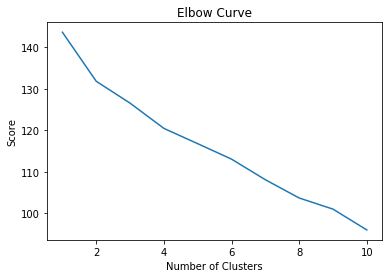

In [27]:
#Import KMeans
from sklearn.cluster import KMeans
# set number of clusters
kclusters = [1,2,3,4,5,6,7,8,9,10]

sydney_grouped_clustering = sydney_grouped.drop('Neighborhood', 1)
kscore = []

for k in range (len(kclusters)):
    kmeans_score = KMeans(n_clusters=kclusters[k], random_state=0).fit(sydney_grouped_clustering).score(sydney_grouped_clustering)*-1
    kscore.append(kmeans_score)


pl.plot(kclusters,kscore)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [28]:
#Import KMeans
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

sydney_grouped_clustering = sydney_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 2], dtype=int32)

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sydney_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sydney_merged = sydney_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Suburb')

sydney_merged.head() # check the last columns!

,Postcode,Suburb,Distance,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
959,2176,ABBOTSBURY,31.53,150.885260,-33.872014,0.0,Pub,Café,Grocery Store,Women's Store,Diner,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
957,2763,ACACIA GARDENS,31.18,150.895470,-33.725619,1.0,Convenience Store,Bus Station,Women's Store,Discount Store,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
1108,2560,AIRDS,43.25,150.768408,-34.194216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,2234,ALFORDS POINT,22.82,151.004412,-34.021938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2100,ALLAMBIE HEIGHTS,10.74,151.257781,-33.766409,1.0,Bus Station,Women's Store,Diner,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


In [30]:
print(sydney_merged["Cluster Labels"].unique())
sydney_merged = sydney_merged.dropna()
#toronto_merged.isna().sum()
sydney_merged["Cluster Labels"] = sydney_merged["Cluster Labels"].astype(int)

[ 0.  1. nan  2.  4.  3.]


In [31]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sydney_merged['lat'], sydney_merged['long'], sydney_merged['Suburb'], sydney_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##  Compare Parramatta and Hornsby Suburbs and produce recommendations

In [32]:
sydney_merged.loc[df['Suburb'] == 'HORNSBY']

,Postcode,Suburb,Distance,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
714,2077,HORNSBY,19.59,151.097508,-33.691922,2,Playground,Coffee Shop,Sports Club,Field,Discount Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [33]:
sydney_merged.loc[df['Suburb'] == 'PARRAMATTA WESTFIELD']

,Postcode,Suburb,Distance,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
702,2150,PARRAMATTA WESTFIELD,19.56,151.006506,-33.814463,0,Thai Restaurant,Chinese Restaurant,Café,Coffee Shop,Asian Restaurant,Burger Joint,Dessert Shop,Mediterranean Restaurant,Sushi Restaurant,Multiplex
